<h1>Modeling a Mars Colony</h1>
    <h4>Doug Woodward</h4>

<b>Problem:</b> With the growing interest around a potential Mars colony it seems clear that there is a high chance one is established in the near future. Given that, how can we model the population growth of a Martian colony? 

<b>Assumptions: </b>
    <ul>
    <li>Mars Colony is established.</li>
    <li>Mars is uninhabited</li>
    <li>No Giant Meteors</li>
    <li>No major population decimating events</li>
    <li>Humans reproduce at about the same rate as on Earth</li>
    </ul>
    


<h3>What model to start with?</h3>

<p>Let's rule out exponential for our model because we can assume that there will be a limit on the size of a Mars colony just due to habitable space and technological reasons.</p>

<h3>Logistic? </h3>

<br>
<hr>
<latex>
\[
\frac{dP}{dt} = rP (1 - \frac{P}{K})
\]
</latex>
<hr>


In [57]:
from __future__ import print_function, division
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from decimal import Decimal as D
from scipy.interpolate import CubicSpline


def logistic(r,K,t):
    ''' This is the standard logistic function, with a fixed carrying capacity'''
    num = np.zeros(t+1)
    num[0] = 1
    for i in range(t):
        num[i+1] = num[i]+r*num[i]*(1-num[i]/K)
    return num

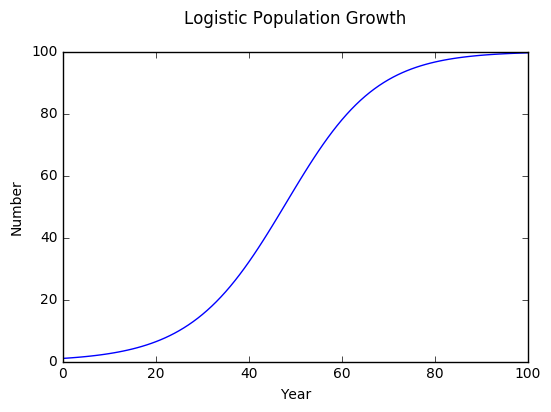

In [58]:
#Define our logistic model parameters for our population
r = .1 # growth rate / yr
K = 100 # carrying capacity
t = 100 # number of years

plotData = logistic(r,K,t)

plt.plot(range(t+1),plotData, 'b')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Logistic Population Growth\n')
plt.show()

Well, that seems reasonable enough. 

Except for one issue. 

Given that Mars is not actually habitable at all right now, and the number of people who can inhabit Mars will be hard capped by the size of artificial habitats and eventually the extent to which it is terraformed. 

<b>That is to say the carrying capacity will actually be dynamically influenced by technology.</b>

<h2>What is the best method for modeling technology?</h2>

<h3>The logistic function! </h3>
 ->due to the adoption rate, and diffusion of technology knowledge

<hr>
<latex>
\[
\frac{dP}{dt} = rP (1 - \frac{P}{K(t)})
\]
</latex>
<hr>

<h4>K becomes a logistic function.<h4> 
<hr>

<hr>
<latex>
\[
\frac{dK}{dt} = r_{K} K(1 - \frac{K}{KMax})
\]
</latex>
<hr>

As Meyer and Ausubel conclude, we actually need our K to start at some initial potential for technology.
<hr>
<latex>
\[
\frac{dK}{dt} = r_{K}(K-K_{1}) (1 - \frac{K-K_{1}}{KMax})
\]
</latex>
<hr>

Analytically solving yields:
<hr>
<latex>
\[
K(t) = K_{1}+ \frac{K_{2}}{1+\exp(-r_{k}(t-t_{m_k}))}
\]
</latex>  
<hr>

In [59]:
def KLogistic(rK,k1,kMax,t,tMid):
    ''' 
        This is the adjusted logistic function for dynamic carying rate which gives us the sigmoidal
        carrying capacity between k1 and kMax
    '''
    num = np.zeros(t+1)
    num[0] = k1
    rK = round(rK,7)
    tMid = round(tMid,7)
    for i in range(int(t)):
        num[i+1] = k1+(kMax/(1+math.exp(-rK*(i-(t/tMid)))))
    return num

def logisticK(r,numK,t):
    ''' 
        A revised logistic function that will take into account a dynamic carrying capacity
        Of note, it does not care how the numK array is produced, but here we are primarly using
        a mofidied logistic that acts sigmoidally between an intial K carrying capacity and a KMax
    '''
    r = round(r,7)
    num = np.zeros(t+1)
    num[0] = 1
    for i in range(t):
        num[i+1] = num[i]+r*num[i]*(1-num[i]/numK[i])
    return num

In [ ]:
#Define our logistic model parameters for our population
r = .25 # growth rate / yr
K = 100 # carrying capacity
t = 100 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .30 #adoption/diffusion rate of the technology
k1 = 50 #the initial level of carrying capacity provided
kMax = 100 #the max possible carrying capacity provided by new tech
kLog = KLogistic(rK,k1,kMax,t,2)

plotDataK = logisticK(r,kLog,t)

plt.plot(range(t+1),plotDataK, 'b')
plt.plot(range(t+1),kLog, 'r')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Logistic Population growth with a logisticlly modeled Carrying Capacity \n')

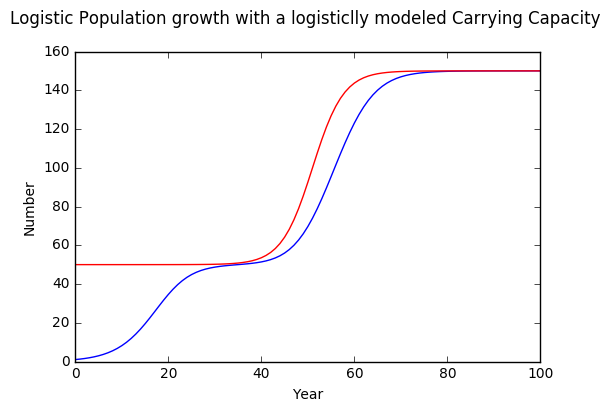

In [60]:
plt.show()

<h1>Applying the Model</h1>
<hr>
Now that we have a base model to work from we should determine how to best to set our parameters for a possible Mars Colony Population Model. 


<hr>
Let's take the obvious analog - Earth. Mars and Earth are both planets, this makes sense.

<hr>
We're going to need the population data of Earth to start with. Taking years 0-2016 as our data:

In [ ]:
earlyHistDates = np.arange(0,1700,100)
earlyPopData = np.array([188,195,202,205,209,210,213,226,240,
                         269,295,353,393,392,390,461,554])
earlyPopData = earlyPopData*1000

midHistDates = np.arange(1700,1900,50)
midPopData = np.array([603,814,989,1263])
midPopData = midPopData*1000


curHistDates = np.arange(1900,1950,10)
curPopData = np.array([1654,1777,1912,2092,2307])
curPopData = curPopData*1000

modHistDates = np.arange(1950,2016,1)
modPopData = np.array([2525149,2571868,2617940,2664029,2710678,2758315,2807246,
                       2857663,2909651,2963216,3018344,3075073,3133554,3194075,
                       3256989,3322495,3390686,3461343,3533967,3607866,3682488,
                       3757735,3833595,3909722,3985734,4061399,4136542,4211322,
                       4286282,4362190,4439632,4518602,4599003,4681211,4765658,
                       4852541,4942056,5033805,5126633,5218978,5309668,5398329,
                       5485115,5570045,5653316,5735123,5815392,5894155,5971883,
                       6049205,6126622,6204311,6282302,6360765,6439842,6519636,
                       6600220,6681607,6763733,6846480,6929725,7013427,7097500,
                       7181715,7265786,7349472
                       ])

In [ ]:
histData = np.concatenate((earlyPopData,midPopData,curPopData,modPopData))
histRange = np.concatenate((earlyHistDates,midHistDates,curHistDates,modHistDates))

plt.plot(histRange,histData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-2016 \n')

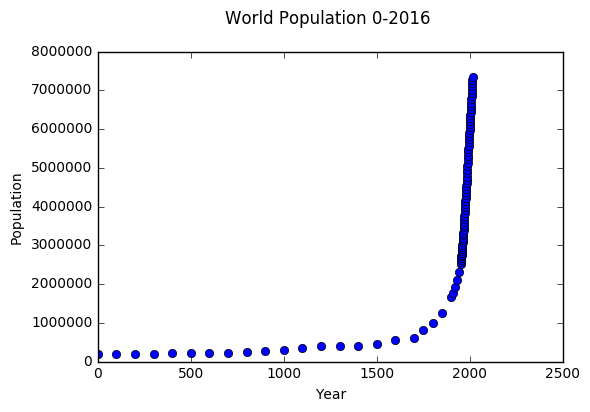

In [27]:
plt.show()

<b>Well, this looks awfully exponential.<b>
<hr>
Perhaps we can change our scaling to prevent the exponential growth from taking over the graph

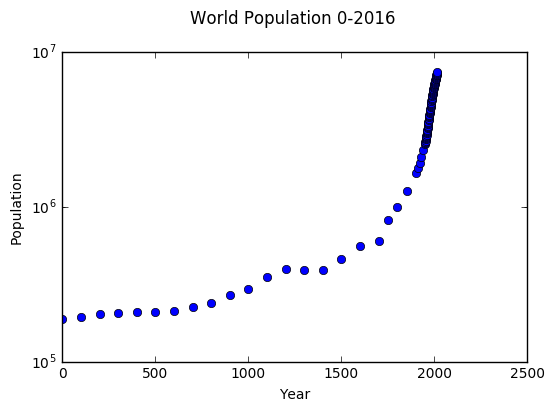

In [28]:
plt.plot(histRange,histData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-2016 \n')
plt.yscale('symlog', linthreshy=0.5)
plt.show()

This is looking better, we now can see what looks like the first pulse and then the second explosion of population growth. 



Let's zoom in a bit

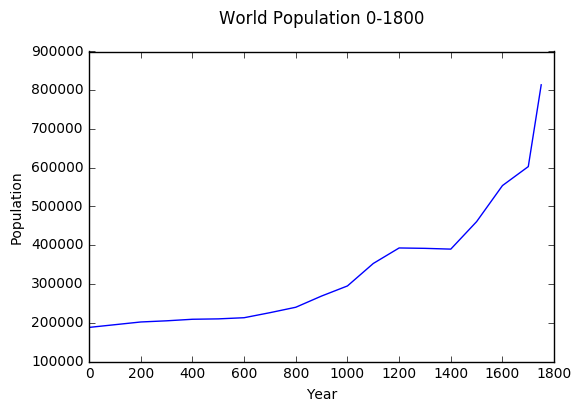

In [40]:
plt.plot(histRange[0:19:1],histData[0:19:1], 'b')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-1800\n')

plt.show()

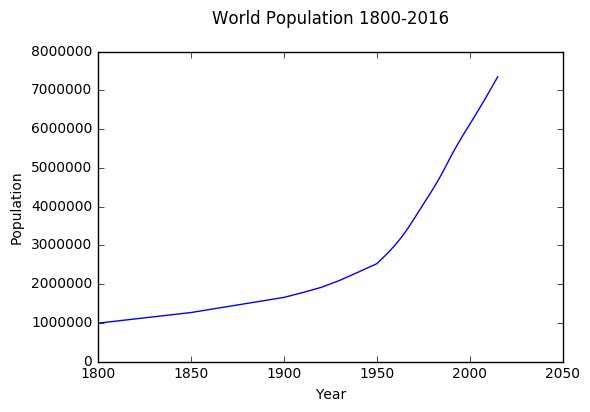

In [42]:
plt.plot(histRange[19:histRange.size:1],histData[19:histData.size:1], 'b')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 1800-2016\n')

plt.show()

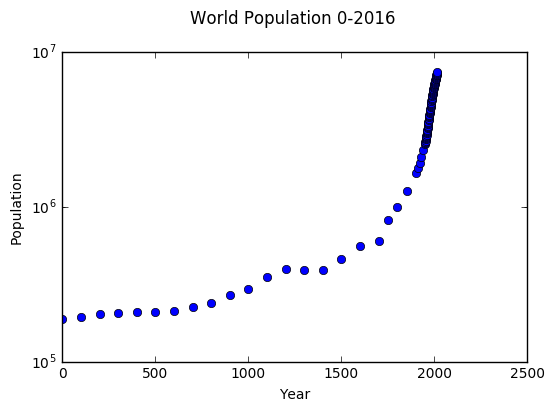

In [37]:
plt.plot(histRange,histData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-2016 \n')
plt.yscale('symlog', linthreshy=0.5)
plt.show()

<h3> Future? </h3>
<hr>
So, given what we have so far, we can see that we what could be taken as a logistic growth from 0-1800, excluding the middle ages and black plague, and just as we see the carring capacity start to limit growth, the industrial revolution kicks in, sending us on the exponetial growth pattern we currently see.

But what about the future? It is reasonable to take the assumption that as the world population expands we will be limited by the planet's resources. 

And the UN population predictions for future population growth backs this.

In [ ]:
midFutureDates = np.arange(2015,2101,1)
midFutureData = np.array([7349472,7432663,7515284,7597176,7678175,7758157,
                          7837029,7914764,7991397,8067008,8141661,8215349,
                          8288055,8359824,8430712,8500766,8570000,8638417,
                          8706032,8772860,8838908,8904177,8968662,9032348,
                          9095213,9157234,9218401,9278694,9338073,9396486,
                          9453892,9510268,9565600,9619870,9673057,9725148,
                          9776138,9826020,9874772,9922372,9968809,10014085,
                          10058223,10101266,10143272,10184290,10224341,10263447,
                          10301668,10339074,10375719,10411635,10446830,10481298,
                          10515022,10547989,10580207,10611689,10642429,10672418,
                          10701653,10730139,10757884,10784884,10811134,10836635,
                          10861387,10885409,10908740,10931432,10953525,10975033,
                          10995954,11016299,11036070,11055270,11073895,11091939,
                          11109392,11126238,11142461,11158037,11172942,11187147,
                          11200617,11213317
                        ])

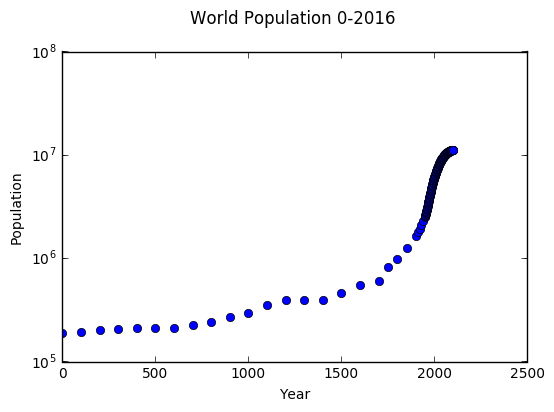

In [53]:
histData = np.concatenate((earlyPopData,midPopData,curPopData,modPopData,midFutureData))
histRange = np.concatenate((earlyHistDates,midHistDates,curHistDates,modHistDates,midFutureDates))
plt.plot(histRange,histData, 'bo')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population 0-2016 \n')
plt.yscale('symlog', linthreshy=0.5)
plt.show()

<h3>Revision</h3>
<hr>
Ok, so there is some argument to be made that the world population works for taking as our training data, but a better assumption would be to treat the Mars colony as a country rather than the globe. 


<hr>
Specifically, an isolated, relativley resource scare country that has a high technology adoption and diffusion rate out of neccesity. 

<hr>
The best candidate here is probably Japan.

In [ ]:
earlyJpDate = np.arange(400,1800,100)
earlyJpPop = np.array([1500000,2000000,4000000,5000000,6000000,7000000,7000000,7000000,
                       6000000,7000000,8000000,8000000,12000000,28000000]) #braben

mejJpDate = np.array([1721,1726,1732,1744,1750,1756,1762,1768,1774,1780,1786,1792,1798,1804,1822,
                     1828,1834,1840,1846,1870])
mejJpPop = np.array([30496900,31104400,31498500,30599500,30323900,30502700,30328100,
                     30714900,30408800,30432400,29351200,29123000,29801100,29977690,
                     31124500,31825600,31664800,31102100,31481900,34620000 
                     ]) #braben

impJpDate = np.arange(1872,1921,1)
impJpPop = np.array([
                    33110796,33300644,33625646,33997415,34338367,34628328,34898540,35768547,
                    35929023,36358955,36700079,37017262,37451727,37868949,38151217,38507177,
                    39069691,39607234,40072020,40453461,40718677,41089940,41388313,41813215,
                    42270620,42708264,43228863,43763855,44270495,44825597,45446369,46041768,
                    46732876,47219566,47678396,48164761,48819630,49588804,50254471,50984844,
                    51753934,52522753,53362682,54142441,54935755,55637431,56335971,56667711,
                    57233906
            ])

midJpDate = np.arange(1920,1955,5)
midJpPop = np.array([55963,59737,64450,69254,71933,72147,82200])
midJpPop = midJpPop*1000

modHistDates = np.arange(1951,2016,1)
modJPop = np.array([83794,85175,86378,87439,88390,89262,90085,
                    90883,91682,92501,93357,94264,95228,96253,97342,
                    98495,99711,100989,102324,103708,105143,106617,
                    108086,109495,110805,111993,113068,114055,114993,
                    115912,116822,117709,118552,119319,119989,120551,
                    121022,121433,121831,122249,122703,123180,123659,
                    124102,124483,124795,125048,125266,125481,125715,
                    125974,126250,126524,126773,126979,127137,127250,
                    127318,127341,127320,127253,127140,126985,126795,
                    126573
            ])
modJPop = modJPop*1000

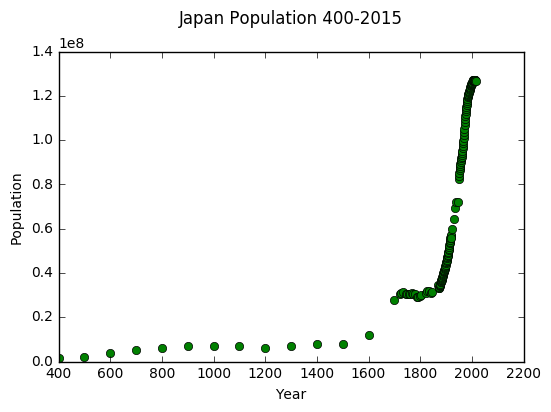

In [113]:
jpData = np.concatenate((earlyJpPop,mejJpPop,impJpPop,midJpPop,modJPop))
jpRange = np.concatenate((earlyJpDate,mejJpDate,impJpDate,midJpDate,modHistDates))
plt.plot(jpRange,jpData, 'go')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
plt.show()

Okay, this looks more promising to our initial hypothesis!
Let's tune our parameters to the data set and then we can
do some extrapolation as to how a Mars Population might grow!

In [ ]:
#Define our logistic model parameters for our population
r = .05 # growth rate / yr
t = 815 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .05 #adoption/diffusion rate of the technology
k1 = 41000000 #the initial level of carrying capacity provided
kMax = 130000000-k1 #the max possible carrying capacity provided by new tech
kLog = KLogistic(rK,k1,kMax,t,1.2)

plotDataK = logisticK(r,kLog,t)

x_values = np.linspace(400, 2015, 816)

plt.plot(jpRange,jpData, 'go',label="JP Pop")
plt.plot(x_values,plotDataK, 'b',label="LogK Function")
plt.plot(x_values,kLog, '--r',label="K")
plt.legend(loc='upper left')

#set axes correctly
axes = plt.gca()
axes.set_xlim([400,2016])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')

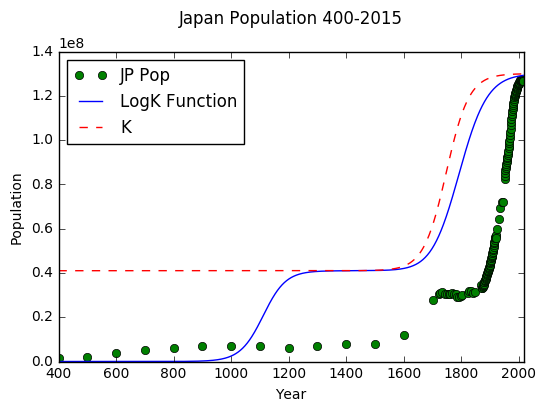

In [63]:
plt.show()

Okay, We are getting the right shape here, but it looks like we have a chunk of leading data we don't need
Let's try from say 1200-Present

In [ ]:
#Define our logistic model parameters for our population
r = .04 # growth rate / yr
t = 815 # number of years

#Define our parameters for the logisticlly modeled
#dynamic carrying capacity
rK = .05 #adoption/diffusion rate of the technology
k1 = 27000000 #the initial level of carrying capacity provided
kMax = 129300000-k1 #the max possible carrying capacity provided by new tech
tM = 1.1
kLog = KLogistic(rK,k1,kMax,t,tM)
plotDataK = logisticK(r,kLog,t)

#set axes correctly
axes = plt.gca()
axes.set_xlim([1200,2016])
axes.set_ylim([7000000,130000000])

#adjust our values for our offset axes
plotDataK = plotDataK+7000000
kLog = kLog+7000000

x_values = np.linspace(1200, 2015, 816)

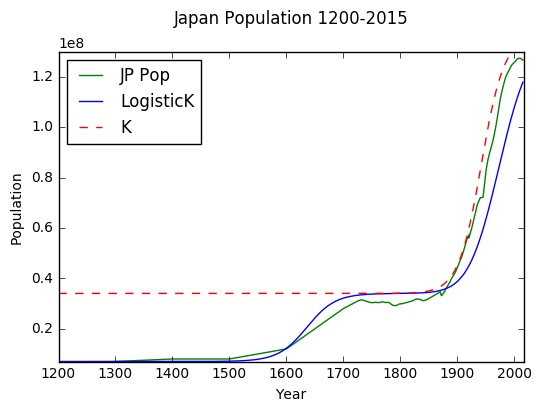

In [73]:
plt.plot(jpRange,jpData, 'g',label="JP Pop")
plt.plot(x_values,plotDataK, 'b',label="LogisticK")
plt.plot(x_values,kLog, '--r',label="K")
plt.legend(loc='upper left')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 1200-2015\n')

plt.show()

<h2>Parameter Fitting</h2>
<hr>
Ok! So this looks pretty good as a starting point. 

Now let's run some Monte Carlo Simulation on it to see how it can be improved with some better parameters!

So in order to do any least squares regression on our data and tune our parameters, we need to rectify some gaps in our data. 

For instance, we only have population data every 100 years from 400-17000.

Sounds like a pretty decent spot to use Cubic Splines for interpolation. In this case, we want natural boundary conditions as well for the most part.

<h3>Early Japan Population Spline </h3>

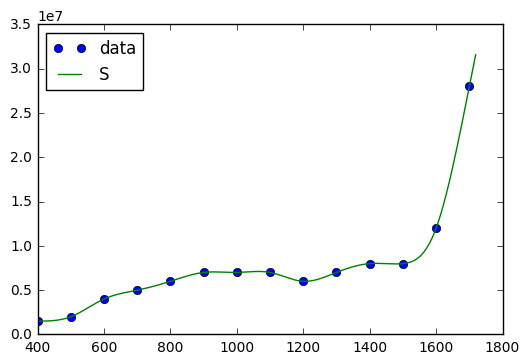

In [75]:
cubicRangeJpEarly = np.arange(400,1720,1)

cs = CubicSpline(earlyJpDate,earlyJpPop,bc_type='natural')
plt.plot(earlyJpDate, earlyJpPop, 'o', label='data')
plt.plot(cubicRangeJpEarly, cs(cubicRangeJpEarly), label="S")
plt.legend(loc='upper left')
plt.show()

cubicFitJpEarly = np.empty(cubicRangeJpEarly.size)
for i in range(cubicRangeJpEarly.size):
    cubicFitJpEarly[i] = cs(cubicRangeJpEarly[i])

<h3>Pre Meiji Restoration Splines</h3>

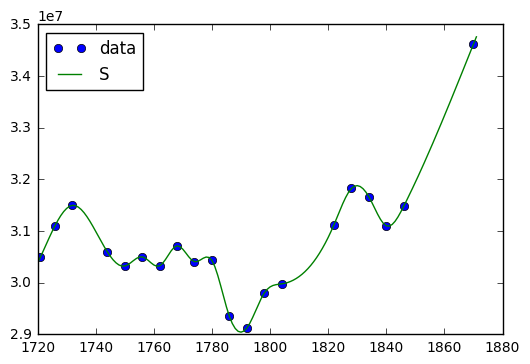

In [76]:
#ok, a little more work required here as we don't have a set interval in this period, but we can work with it
cubicRangeMej = np.arange(1720,1872,1)
csMej = CubicSpline(mejJpDate,mejJpPop,bc_type=('not-a-knot','natural'))
plt.plot(mejJpDate, mejJpPop, 'o', label='data')
plt.plot(cubicRangeMej, csMej(cubicRangeMej), label="S")
plt.legend(loc='upper left')
plt.show()
cubicFitJpMej = np.empty(cubicRangeMej.size)
for i in range(cubicFitJpMej.size):
    cubicFitJpMej[i] = csMej(cubicRangeMej[i])

<h3>Twentieth Century Japan Splines</h3>

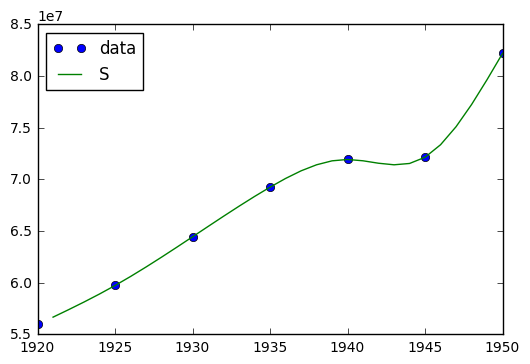

In [77]:
cubicRangeJpMid = np.arange(1921,1951,1)

csJpMid = CubicSpline(midJpDate,midJpPop,bc_type='natural')
plt.plot(midJpDate, midJpPop, 'o', label='data')
plt.plot(cubicRangeJpMid, csJpMid(cubicRangeJpMid), label="S")
plt.legend(loc='upper left')
plt.show()

cubicFitJpMid = np.empty(cubicRangeJpMid.size)
for i in range(cubicFitJpMid.size):
    cubicFitJpMid[i] = csJpMid(cubicRangeJpMid[i])
    

In [ ]:
np.set_printoptions(threshold=np.inf)
jpData = np.concatenate((cubicFitJpEarly,cubicFitJpMej,impJpPop,cubicFitJpMid,modJPop))
jpRange = np.concatenate((cubicRangeJpEarly,cubicRangeMej,impJpDate,cubicRangeJpMid,modHistDates))
x_values = np.linspace(1200, 2015, 816)
plt.plot(jpRange,jpData, 'b', label='Data')
plt.plot(x_values,plotDataK, 'g', label='LogisticK')
plt.plot(x_values,kLog, '--r', label='K')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
axes = plt.gca()
axes.set_xlim([1200,2050])
axes.set_ylim([7000000,140000000])

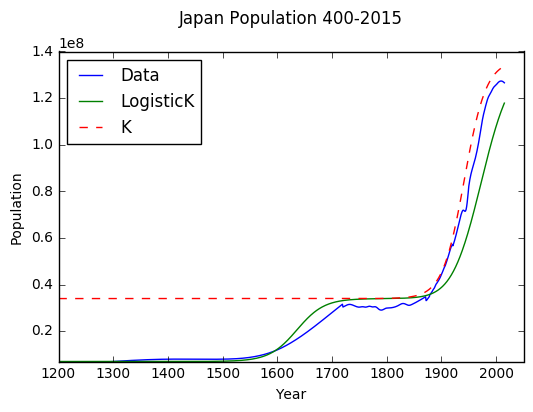

In [78]:
plt.show()

<h2>
<latex>
\[
R^{2}
\]
</latex>
</h2>

In [79]:
def r2(y_fit,y):
    res = np.sum((y-y_fit)**2)
    
    sumSq = np.sum((y-np.mean(y))**2)
    rSq = 1-(res/sumSq)
    return rSq

print(r2(plotDataK[0:816],jpData[800:1616]))


0.944364149406


<h1>Monte Carlo Refinement</h1>

Well how about that! It looks like our function matches fairly well!
Though we still have a fair bit of room for improvement, to Monte Carlo we go!

We're actually going to use Simulated Annealing, which is a type of Monte Carlo that allows for finding Min/Max values of a function, in this case we want to minimize 1-r2

In our monte carlo simulation, we want to tune the parameters r, rK, and tM
and our fitness function will be r2. 

Note: We ran our Simulated Annealing algorithm for each of r, rK, and tM. Below only shows the result after running the final SA for tM after obtaining good r and rK values in prior sims.

In [ ]:
def cost(y_fit,y):
    res = np.sum((y-y_fit)**2)
    
    sumSq = np.sum((y-np.mean(y))**2)
    rSq = 1-(res/sumSq)
    return 1-rSq
#Define our starting parameters for our population
r = 37/1000 # growth rate / yr
rK = 5/100 #adoption/diffusion rate of the technology
tM = 1115/1000

#some neccesary constants
k1 = 26000000 #the initial level of carrying capacity provided
kMax = 129300000-k1 #the max possible carrying capacity provided by new tech
t = 815 # number of years
numSims = 1000 #number of simulations to test

#our baseline to compare against
baseline = jpData[800:1616]

In [ ]:
#Monte Carlo/Simulated Annealing functions

def AcceptNeighbor(current, neighbor, curTemp):
        curFit = cost(current,baseline)
        nFit = cost(neighbor,baseline)
        if(nFit<curFit):
            return True
        else:
            #pAccept = math.exp((1-(r2(neighbor,baseline)))-(1-r2(current,baseline))/curTemp)
            pAccept = math.exp(-(nFit-curFit)/curTemp)
            if pAccept>1:
                pAccept = 1
            if random.uniform(0, 1) < pAccept:
                return True
        return False

def CalculateTemp(step,nSteps):
    initialTemp = 1
    gamma = 5.0
    return initialTemp*(1-gamma/nSteps)**step

def GenerateNeighbor(currentParms,modParm):
    #we will randomly adjust our tM 
    #up or down by a small amount
    neighbor = currentParms[:]
    plusMin = random.randint(0,1)
    scale = random.randint(1,100)
    if(plusMin == 1):
        neighbor[modParm] += 0.001*scale
    else:
        neighbor[modParm] -= 0.001*scale
    return neighbor

In [947]:
def generateFromParms(parms):
    r = parms[0]
    rK = parms[1]
    tM = parms[2]
    
    kLog = KLogistic(rK,k1,kMax,t,tM)
    return logisticK(r,kLog,t)


def simulatedAnnealling(currentParms,nSteps,mod):
    mvCount = 0
    bestParms = 0;
    bestR2 = 0;
    for i in range(1,nSteps):
        neighborParms = GenerateNeighbor(currentParms,mod)
        currentTemp = CalculateTemp(i,nSteps)
        current = generateFromParms(currentParms)
        neighbor = generateFromParms(neighborParms)
        if AcceptNeighbor(current,neighbor,currentTemp):
            mvCount +=1
            currentParms = neighborParms
    return currentParms

In [ ]:
initParms = [r,rK,tM]
fitParms = simulatedAnnealling(initParms,numSims,2)

newR = fitParms[0]
newRK = fitParms[1]
newTM = fitParms[2]
kLog = KLogistic(newRK,k1,kMax,t,newTM)
newFit = logisticK(newR,kLog,t)    

x_values = np.linspace(1200, 2015, 816)
#adjust our values for our offset axes
newFit = newFit+7000000
kLog = kLog+7000000

plt.plot(jpRange,jpData, 'b', label='Data')
plt.plot(x_values,newFit, 'g', label='NewFit')
plt.plot(x_values,kLog, '--r', label='K')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Japan Population 400-2015\n')
axes = plt.gca()
axes.set_xlim([1200,2050])
axes.set_ylim([7000000,140000000])
plt.show()
print(fitParms)
print(r2(newFit[0:816],jpData[800:1616]))

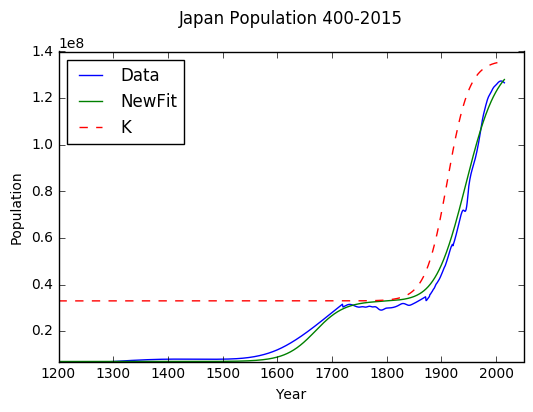

[0.037, 0.05, 1.148000000000003]
0.992364508719


Well, It looks like this is about as good of a function as we can get. Now that we have an understanding of what the growth of a confined, technology dependent population would be, we can take this and extrapolate to a Martian colony.

<h1>Model Application to Mars</h1>

For the Martian Colony let's take 1000 years of growth to start.

In [ ]:
marsT = 1000
newR = 0.037
newRK = 0.05
newTM = 1.148
kLog = KLogistic(newRK,k1,kMax,marsT,newTM)
newFit = logisticK(newR,kLog,marsT)    
plt.plot(range(marsT+1),newFit, 'rx')
plt.plot(range(marsT+1),kLog, '--b', label='K')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-1000 MA\n')

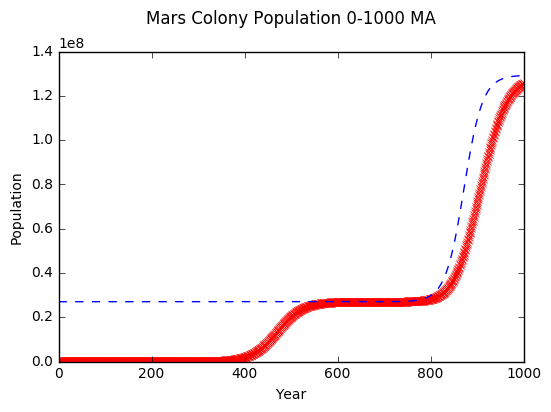

In [81]:
plt.show()

So what could this possible be taken to represent? Let's focus on the two pulses in the logistic curve that we see. The first pulse can be understood as the intial population boom on Mars once the early pioneers have established a self sustaining colony

Then, what of the second pulse? Well, clearly it should be taken as a huge technology leap.
The obvious technology here - terraforming

<h3>Accounting for radical technology advances</h3>

Terraforming would probably take much longer to take effect, so let's adjust our parameters and time scale a bit

In [ ]:
marsT = 10000
kLog = KLogistic(newRK*.2,k1*.2,kMax,marsT,newTM)
newFit = logisticK(newR*.2,kLog,marsT)    

plt.plot(range(marsT+1),newFit, 'r')
plt.plot(range(marsT+1),kLog, '--b', label='K')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-1000 MA\n')

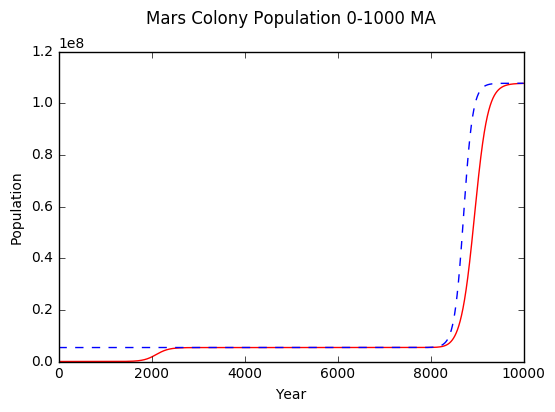

In [82]:
plt.show()

Ok, that seems a bit more like it!

We don't have any real idea of how long terraforming mars will take, but as you can see, once we have a better idea of that timeframe, we can adjust some of our parameters and then we can get a picture of the population growth.

But what of the carrying capacity post terraform?

Well, Mars has roughly the surface area of earth. But we should also consider the emergence of oceans once terraformed.
Rough estimates place the ancient Martian Ocean at about a third of the planet's surface.

Let's combine that, with the assumption that Mars will be less densely populated that Earth, and mark the carrying capacity at one third of Earth's.

In [ ]:
marsT = 10000
marsKMax = 7500000000*(1/3)
kLog = KLogistic(newRK*.2,k1*.2,marsKMax,marsT,newTM)
newFit = logisticK(newR*.2,kLog,marsT)    

plt.plot(range(marsT+1),newFit, 'r')
plt.plot(range(marsT+1),kLog, '--b', label='K')
#plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-10000 MA\n')

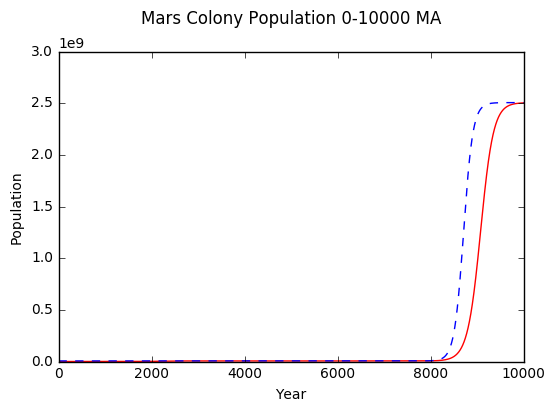

In [98]:
plt.show()

Let's zoom in on the first portion here for some clarity

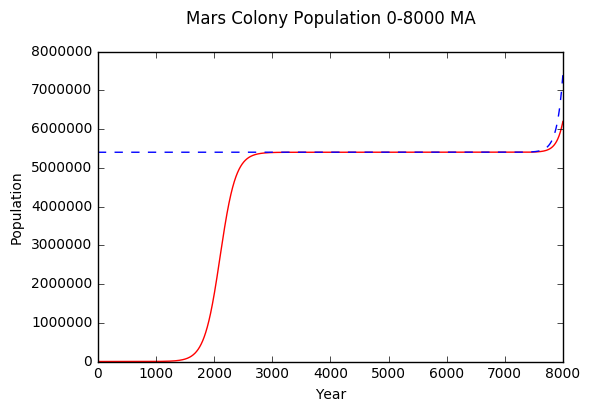

In [112]:
x_values = np.linspace(0, 8000, 8000)
plt.subplot()

plt.plot(x_values,newFit[0:8000], 'r')
plt.plot(x_values,kLog[0:8000], '--b', label='K')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 0-8000 MA\n')

plt.show()

10001


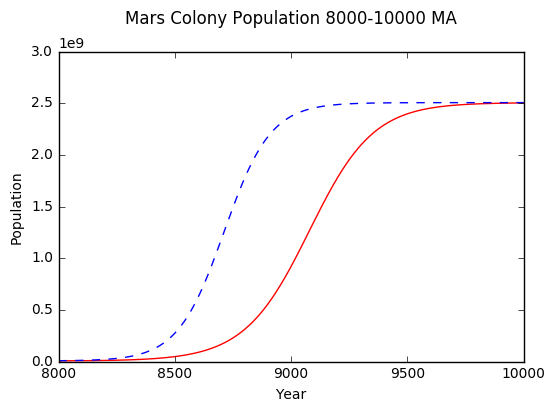

In [107]:
x_values = np.linspace(8000, 10000, 2000)
print(newFit.size)
plt.plot(x_values,newFit[8000:10000], 'r')
plt.plot(x_values,kLog[8000:10000], '--b', label='K')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Mars Colony Population 8000-10000 MA\n')

plt.show()

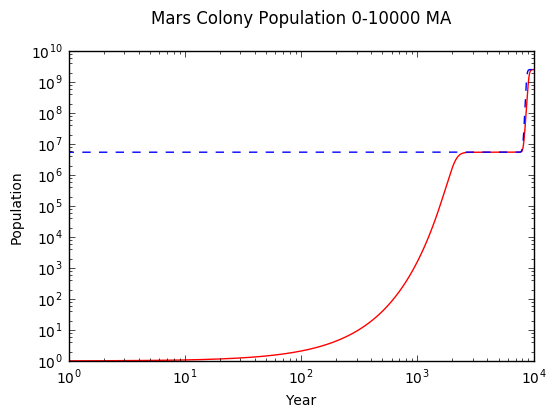

In [133]:
marsT = 10000
marsKMax = 7500000000*(1/3)
kLog = KLogistic(newRK*.2,k1*.2,marsKMax,marsT,newTM)
newFit = logisticK(newR*.2,kLog,marsT)    

plt.plot(range(marsT+1),newFit, 'r')
plt.plot(range(marsT+1),kLog, '--b', label='K')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xscale('log')
plt.yscale('log')


plt.title('Mars Colony Population 0-10000 MA\n')
plt.show()

<h1>Sources</h1>
<ul>
<li>Technological Forecasting and Social Change 61(3):209–214, 1999.
        Carrying Capacity: A Model with Logistically Varying Limits
        PERRIN S. MEYER and JESSE H. AUSUBEL2
</li>
<li>UN Population Division https://esa.un.org/unpd/wpp/</li>
<li>"The History of the Human Population From the First Beginnings to the Present" in "Demography: Analysis and Synthesis: A Treatise in Population"
        Jean-Noël Biraben, 
         (Eds: Graziella Caselli, Jacques Vallin, Guillaume J. Wunsch) Vol 3, Chapter 66, pp 5–18, Academic Press, San Diego 
</li>
<li>
Jean-Noël Biraben, "Le Point sur l'Histoire de la Population du Japon", Population Vol. 48 (no. 2), pp. 443-472 (1993)
</li>
<li>"Integrated modelling of global environmental change. An overview of IMAGE 2.4",
         History Database of the Global Environment.
         K. Klein Goldewijk and G. van Drecht, 
         "HYDE 3.1: Current and historical population and land cover", 
               in Eds. A. F. Bouwman, T. Kram, and K. Klein Goldewijk, 
         Netherlands Environmental Assessment Agency (MNP), Bilthoven, The Netherlands.
</li>
<li>Robert M. Zubrin (Pioneer Astronautics), Christopher P. McKay. NASA Ames Research Center (c. 1993). "Technological Requirements for Terraforming Mars"
</li>
<li> Clifford, S. M. and T. J. Parker, 2001: The Evolution of the Martian Hydrosphere: Implications for the Fate of a Primordial Ocean and the Current State of the Northern Plains, Icarus 154, 40–79.</li>